In [1]:
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
from IPython.core.display import display, HTML
import scipy.constants as sc
from scipy.optimize import fsolve
from ipywidgets import interact, widgets
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os

print(os.getpid())
%cd ../

12046
/media/work/docs/codes/c++/QSVT_framework/simulations


In [2]:
# choose a case to analyse
case_to_model = "small"
path_case = "./XW_waves/small-case"

In [3]:
# read a .hdf5 file:
import XW_waves.xw_1d as xw
mix = xw.mix
mse = xw.mse
mix.reload_module(xw)

dd = {
    "path": path_case,
    "pname": "XW"
}
dd = mse.open_all(dd)

print("\n----------------------------------------------------------------")
for key, value in dd.items():
    if key != "states" and key != "t":
        print(f"{key}: {value}")
print("----------------------------------------------------------------")


beta = dd["qsp"]["norm"]  # inverse of the normalization of the Hamiltonian
t = dd["t"]
print()
print("QSP time step: {:0.3f}".format(dd["qsp"]["dt"]))
print("QSP normalization: {:0.3e}".format(dd["qsp"]["norm"]))
print("real time step: {:0.3e}".format(dd["qsp"]["dt"] * dd["qsp"]["norm"]))
print("last real time moment: {:0.3f}".format(t[-1]*beta))

path_fig = path_case + "/" + dd["pname"] + "-" + case_to_model + "-"


--- Reading the file ./XW_waves/small-case/XW_OUTPUT.hdf5...
Simulation has been performed  04-17-2022 13:24:36

----------------------------------------------------------------
path: ./XW_waves/small-case
pname: XW
flag-restart: True
start-0: {'date-of-sim': '04-17-2022 13:24:36', 'launch-path': '/media/work/docs/codes/c++/QSVT_framework/simulations/XW_waves/small-case', 'path-inputs': '/media/work/docs/codes/c++/QSVT_framework/simulations/XW_waves/small-case'}
project-name: XW
nq: 18
na: 9
reg-names: ['qb', 'a', 'aj', 'ad', 'd', 'j']
reg-nq: [2 2 2 3 3 6]
regs: {'qb': 2, 'a': 2, 'aj': 2, 'ad': 3, 'd': 3, 'j': 6}
reg-shifts: {'qb': 0, 'a': 2, 'aj': 4, 'ad': 6, 'd': 9, 'j': 12}
qsp: {'dt': 1.782, 'norm': 0.141, 'prec': 1e-06, 'angles': array([ 3.141e+00,  3.140e+00,  3.128e+00,  3.015e+00,  2.194e+00,
       -1.604e-01, -2.158e+00, -1.459e+00,  9.568e-01,  1.684e+00,
       -6.249e-01, -1.352e+00,  1.064e+00,  3.657e-01, -1.631e+00,
        7.228e-01, -9.824e-02,  1.441e-02,  1.713e-0

In [4]:
# --- read output states at every time step ---
mix.reload_module(xw)
mse.read_all_output_states(dd)

# --- read x-grid ---
x_qc = mse.get_x_grid(dd, "j")
print("size of x-grid is", np.size(x_qc))


--- Reading the file ./XW_waves/small-case/XW_OUTPUT.hdf5...
size of x-grid is 64


In [5]:
# --- print initial states ---
mix.reload_module(xw)

print("-----------------------------------------------------------------------------")
mse.print_initial_states(dd)
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
--- Initial state ---
Registers: 
{'qb': 2, 'a': 2, 'aj': 2, 'ad': 3, 'd': 3, 'j': 6}

             7.071e-01   |00>|00>|00>|000>|101>|011100>
             7.071e-01   |00>|00>|00>|000>|101>|011101>
-----------------------------------------------------------------------------


In [6]:
# --- get amplitudes of variables ---
mix.reload_module(xw)
vx = mse.get_amplitudes_xt(dd, {"d": 0}, "j")
vy = mse.get_amplitudes_xt(dd, {"d": 1}, "j")
Ex = mse.get_amplitudes_xt(dd, {"d": 2}, "j")
Ey = mse.get_amplitudes_xt(dd, {"d": 3}, "j")
Bz = mse.get_amplitudes_xt(dd, {"d": 4}, "j")
Q  = mse.get_amplitudes_xt(dd, {"d": 5}, "j")

Wv = np.abs(vx)**2 + np.abs(vy)**2
We = np.abs(Ex)**2 + np.abs(Ey)**2
Wb = np.abs(Bz)**2
Wq = np.abs(Q)**2
W = Wv + We + Wb + Wq

In [7]:
# --- perform classical simulations ---
xw.mix.reload_module(xw)
dd_cl = xw.init(case_to_model)
print()
vars_cl = xw.launch(dd_cl)

x_cl = dd_cl["x-plot"]
t_cl = dd_cl["t-norm"]


vx_cl = vars_cl['vx']
vy_cl = vars_cl['vy']
Ex_cl = vars_cl['Ex']
Ey_cl = vars_cl['Ey']
Bz_cl = vars_cl['Bz']
Q_cl = vars_cl['Q']

Wv_cl = vars_cl["Wv"]
We_cl = vars_cl["We"]
Wb_cl = vars_cl["Wb"]
Wq_cl = vars_cl["Wq"]
W_cl = Wv_cl + We_cl + Wb_cl + Wq_cl

Simulation of a --- SMALL --- case

---------------------------------------------------------------------
--- Classical parameters ---
nqx, nx = 6, 64
t, nt = 100.000, 400
norm. time step: 2.513e-01
Courant number is: 4.699e-01

---------------------------------------------------------------------
--- QC parameters ---
QC time step: 1.782
QC normalization of a Hamiltonian matrix: 7.091
QC 1/norm_of_H: 1.410e-01
QC source init. value: 7.071e-01
QC time to simulate: 709.066
QC number of time steps: 398

Computation... id-t = 300
Done
(sumx W[1] - sumx W[-1])/sumx W[1]: -7.129e-04


In [8]:
# -------------------------------------------------------------------
# --- Calculate energy integrated in space ---
# -------------------------------------------------------------------
nt = len(t)
Wt_v = np.array([np.sum(Wv[:,i]) for i in range(nt)])
Wt_e = np.array([np.sum(We[:,i]) for i in range(nt)])
Wt_b = np.array([np.sum(Wb[:,i]) for i in range(nt)])
Wt_q = np.array([np.sum(Wq[:,i]) for i in range(nt)])
Wt = np.array([np.sum(W[:,i]) for i in range(nt)])

nt_cl = len(t_cl)
Wt_v_cl = np.array([np.sum(Wv_cl[:,i]) for i in range(nt_cl)])
Wt_e_cl = np.array([np.sum(We_cl[:,i]) for i in range(nt_cl)])
Wt_b_cl = np.array([np.sum(Wb_cl[:,i]) for i in range(nt_cl)])
Wt_q_cl = np.array([np.sum(Wq_cl[:,i]) for i in range(nt_cl)])
Wt_cl = np.array([np.sum(W_cl[:,i]) for i in range(nt_cl)])

<IPython.core.display.Javascript object>


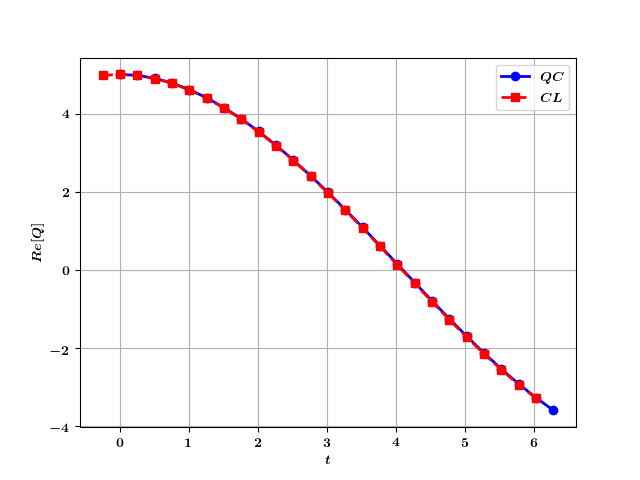

<IPython.core.display.Javascript object>


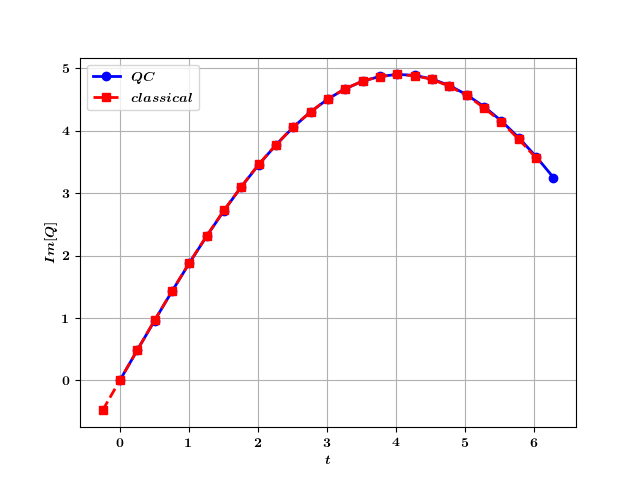

In [9]:
# ----------------------------------------------------------------------------------
# --- Compare signals in time at a particular x-point with classical data ---
# ----------------------------------------------------------------------------------
idx_point = vars_cl['ids-Q'][1] 

y_qc, y_cl, label_y = vx, vx_cl, "v_x"
y_qc, y_cl, label_y = vy, vy_cl, "v_y"
# y_qc, y_cl, label_y = Ex, Ex_cl, "E_x"
# y_qc, y_cl, label_y = Ey, Ey_cl, "E_y"
# y_qc, y_cl, label_y = Bz, Bz_cl, "B_z"
y_qc, y_cl, label_y = Q, Q_cl, "Q"


# y_qc, y_cl, label_y = Wv/beta, Wv_cl, "Wv"
# y_qc, y_cl, label_y = We/beta, We_cl, "We"
# y_qc, y_cl, label_y = Wb/beta, Wb_cl, "Wb"
# y_qc, y_cl, label_y = Wq/beta, Wq_cl, "Wq"
# y_qc, y_cl, label_y = W/beta, W_cl, "W"

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t*beta, np.real(y_qc[idx_point,:]/beta), 
    color='b', 
    marker="o", 
    linewidth = 2, linestyle='-', 
    label = "$QC$"
)
ax.plot(
    t_cl[0:len(t)], np.real(y_cl[idx_point,0:len(t)]), 
    color='r', 
    marker="s", 
    linewidth = 2, linestyle='--',
    label = "$CL$" 
)
plt.xlabel('$t$')
plt.ylabel("$Re[" + label_y + "]$")
ax.legend()
plt.grid(True)
plt.show()
plt.savefig(path_fig + label_y + '-real.png')



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t*beta, np.imag(y_qc[idx_point,:]/beta), 
    color='b', 
    marker="o", 
    linewidth = 2, linestyle='-', 
    label = "$QC$"
)
ax.plot(
    t_cl[0:len(t)], np.imag(y_cl[idx_point,0:len(t)]), 
    color='r', 
    marker="s", 
    linewidth = 2, linestyle='--',
    label = "$classical$" 
)
plt.xlabel('$t$')
plt.ylabel("$Im["+ label_y +"]$")
ax.legend()
plt.grid(True)
plt.show()
plt.savefig(path_fig + label_y + '-imag.png')

<IPython.core.display.Javascript object>


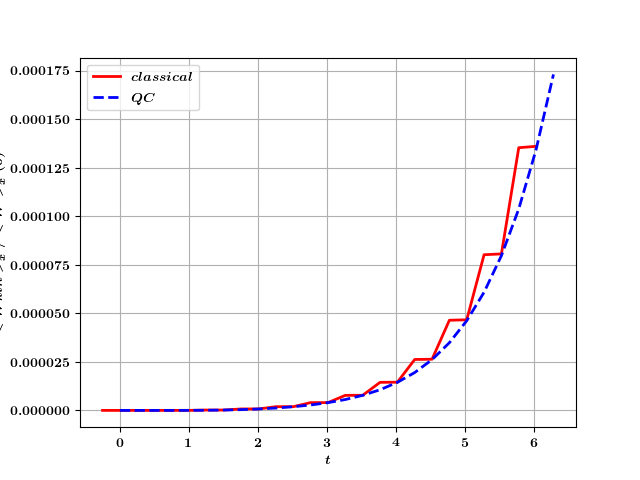

In [10]:
# ----------------------------------------------------------------------------------
# --- Compare energy integrated in space ---
# ----------------------------------------------------------------------------------
y_qc, y_cl, label_y = Wt_v, Wt_v_cl, "<Wkin>_x"
# y_qc, y_cl, label_y = Wt_e, Wt_e_cl, "<We>_x"
# y_qc, y_cl, label_y = Wt_b, Wt_b_cl, "<Wb>_x"
# y_qc, y_cl, label_y = Wt_q, Wt_q_cl, "<Wq>_x"
# y_qc, y_cl, label_y = Wt, Wt_cl, "<W>_x"



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(
    t_cl[0:len(t)], y_cl[0:len(t)]/Wt_cl[1], 
    color='r', 
    linewidth = 2, linestyle='-',
    label = "$classical$" 
)
ax.plot(
    t*beta, y_qc/Wt[1], 
    color='b',  
    linewidth = 2, linestyle='--', 
    label = "$QC$"
)
plt.xlabel('$t$')
plt.ylabel("$"+ label_y +"/<W>_x(0)$")
ax.legend()
plt.grid(True)
plt.show()
plt.savefig(path_fig + label_y + '.png')